In [2]:
import os
print(os.getcwd())
path = os.getcwd()

d:\classification_algo


In [3]:
! kaggle datasets download -d aemyjutt/salary-binary-classifier -p path

Dataset URL: https://www.kaggle.com/datasets/aemyjutt/salary-binary-classifier
License(s): CC0-1.0




  0%|          | 0.00/460k [00:00<?, ?B/s]
100%|██████████| 460k/460k [00:00<00:00, 471MB/s]


In [4]:
from zipfile import ZipFile

path = os.path.abspath('salary-binary-classifier.zip')

with ZipFile(path, 'r') as z:
    
    z.extractall()
    
    print('Zip File Extracted')

Zip File Extracted


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV, train_test_split

In [71]:
data_path = os.path.abspath('salary.csv')

salary_data = pd.read_csv(data_path)

In [48]:
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
salary_data['salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [50]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
salary_data['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

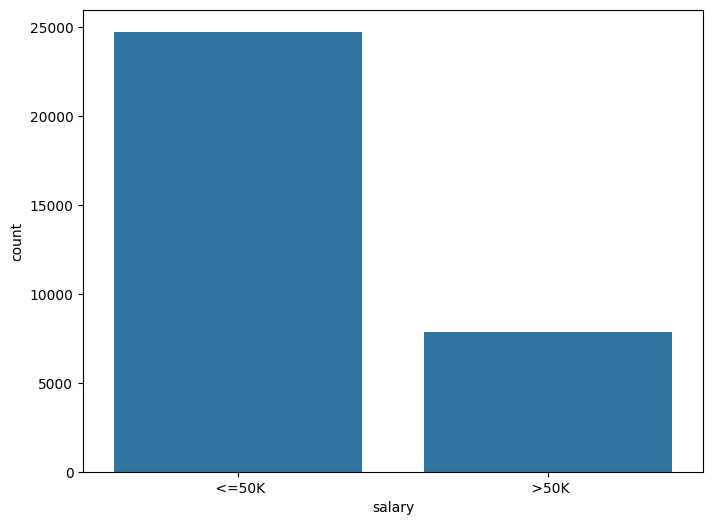

In [52]:
plt.figure(figsize = (8, 6))
sns.countplot(salary_data, x= 'salary')

In [53]:
salary_data[salary_data['age'] == 40]['salary'].value_counts()

salary
<=50K    526
>50K     268
Name: count, dtype: int64

In [62]:
salary_data['salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [69]:
salary_data.replace({'salary' :{' <=50K' : 0, ' >50K' : 1}}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9504\2519594569.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_data.replace({'salary' :{' <=50K' : 0, ' >50K' : 1}}, inplace=True)


In [70]:
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [73]:
salary_data['salary'] = salary_data['salary'].map( {' <=50K' : 0, ' >50K' : 1})

In [74]:
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [75]:
salary_data['salary'].value_counts()

salary
0    24720
1     7841
Name: count, dtype: int64

In [78]:
realtion_one = salary_data[salary_data['salary'] == 0]['age'].value_counts()

realtion_two = salary_data[salary_data['salary'] == 1]['age'].value_counts()

print(f'The Ages Lower Than 50 K {realtion_one}')
print(f'The Ages greater Than 50 K {realtion_two}')


The Ages Lower Than 50 K age
23    865
25    788
24    767
27    754
20    753
     ... 
83      4
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
The Ages greater Than 50 K age
37    292
46    292
45    288
47    288
38    282
     ... 
81      3
19      2
80      2
83      2
84      1
Name: count, Length: 65, dtype: int64


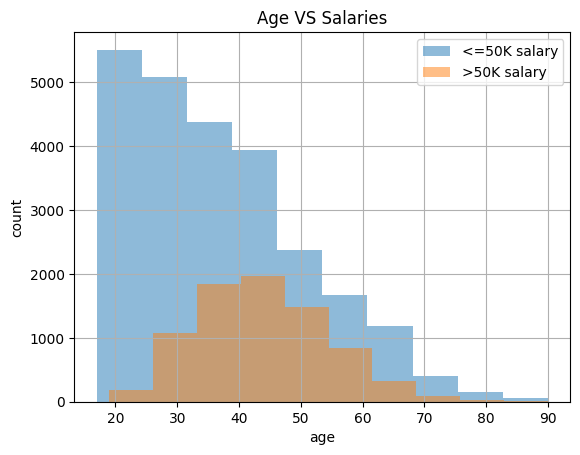

In [82]:
salary_data[salary_data['salary'] == 0]['age'].hist(label = '<=50K salary', alpha = 0.5)
salary_data[salary_data['salary'] == 1]['age'].hist(label = '>50K salary', alpha = 0.5)
plt.title('Age VS Salaries')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

In [84]:
encoder = LabelEncoder()

In [86]:
for column in salary_data.drop(columns=['salary'], axis=1):
    salary_data[column] = encoder.fit_transform(salary_data[column])

In [87]:
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


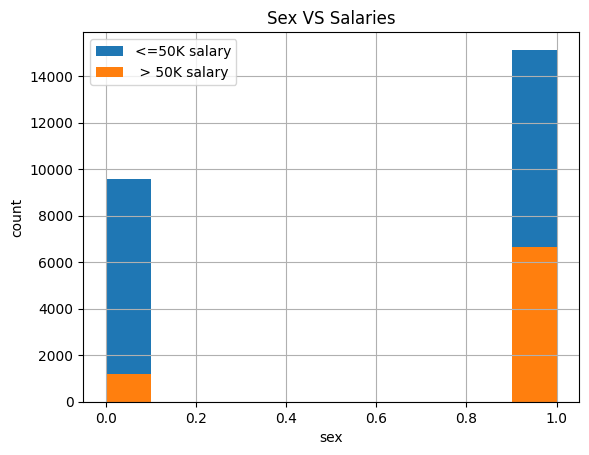

In [89]:
salary_data[salary_data['salary'] == 0]['sex'].hist(label = '<=50K salary')
salary_data[salary_data['salary'] == 1]['sex'].hist(label = ' > 50K salary')
plt.title('Sex VS Salaries')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend()
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
x = salary_data.drop(columns = 'salary', axis = 1)
y = salary_data['salary']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [94]:
scaler = StandardScaler()

In [95]:
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [96]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [97]:
X_train

array([[-0.56100696,  0.08977264,  0.91662833, ..., -0.20328748,
        -0.0268673 , -4.20436365],
       [-0.12321564,  2.1506402 , -1.60340242, ..., -0.20328748,
        -0.0268673 ,  0.29124722],
       [-1.5095548 ,  0.08977264,  0.26392881, ..., -0.20328748,
        -0.0268673 ,  0.29124722],
       ...,
       [ 0.53347133, -1.97109492, -1.53276894, ...,  1.77612758,
         0.80056155,  0.29124722],
       [-1.43658958,  0.08977264,  1.74541643, ..., -0.20328748,
        -0.0268673 ,  0.29124722],
       [-0.85286783,  0.08977264, -0.20063481, ..., -0.20328748,
        -0.0268673 ,  0.29124722]], shape=(26048, 14))

In [98]:
model = DecisionTreeClassifier()

In [113]:
params = {
    'max_depth' : [1, 3, 5, 8, 10],
}

In [114]:
gridSearch= GridSearchCV(model, params, cv = 5)

In [115]:
gridSearch.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [1, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [116]:
print(gridSearch.best_estimator_)
print(gridSearch.best_score_)

DecisionTreeClassifier(max_depth=8)
0.8540387245019969


In [139]:
new_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

In [140]:
new_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [141]:
y_predict = new_model.predict(X_test)

In [142]:
print(accuracy_score(y_test, y_predict))

0.8220482112697681


In [143]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(new_model,X_train, y_train, cv = 5)

mean_cv_scores = sum(cv_scores) / len(cv_scores)
mean_cv_scores = mean_cv_scores * 100
mean_cv_scores = round(mean_cv_scores, 2)
print(cv_scores)
print(mean_cv_scores)

[0.83051823 0.82552783 0.82917466 0.82088693 0.83029372]
82.73


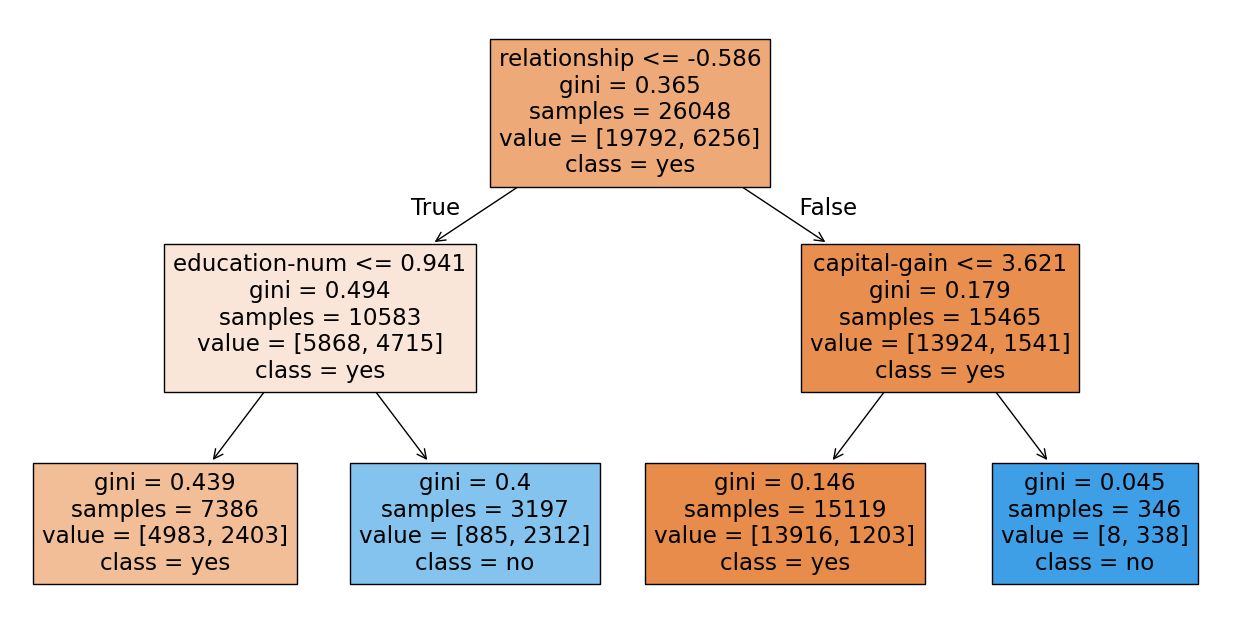

In [144]:
from sklearn import tree

plt.figure(figsize = (16, 8))
tree.plot_tree(new_model, feature_names = x.columns, class_names = ['yes', 'no'], filled = True)
plt.show()

In [146]:
print(confusion_matrix(y_test, y_predict))

[[4710  218]
 [ 941  644]]


<Axes: >

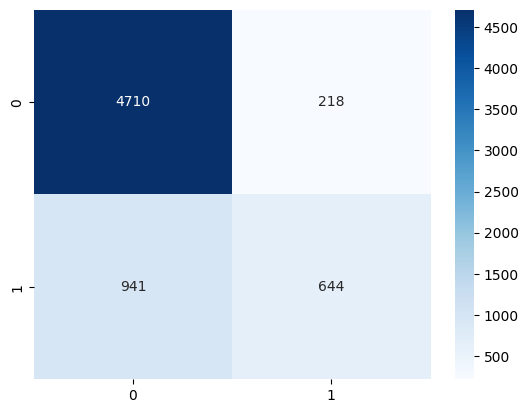

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
